<a href="https://colab.research.google.com/github/anishsheikh1303/AI-based-Stock-Prediction/blob/main/Microsoft_AI_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

In [2]:
import pandas as pd
df = pd.read_csv('MSFT.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060980,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063158,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064247,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062613,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061524,47894400
...,...,...,...,...,...,...,...
9204,2022-09-19,242.470001,245.139999,240.850006,244.520004,244.520004,26826900
9205,2022-09-20,242.070007,243.509995,239.639999,242.449997,242.449997,26660300
9206,2022-09-21,244.270004,247.660004,238.899994,238.949997,238.949997,28625600
9207,2022-09-22,237.869995,243.860001,237.570007,240.979996,240.979996,31061200


In [3]:
df = df[['Date', 'Close']]
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9204,2022-09-19,244.520004
9205,2022-09-20,242.449997
9206,2022-09-21,238.949997
9207,2022-09-22,240.979996


In [4]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9204    2022-09-19
9205    2022-09-20
9206    2022-09-21
9207    2022-09-22
9208    2022-09-23
Name: Date, Length: 9209, dtype: object

In [5]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year = year, month = month, day = day)

datetime_object = str_to_datetime('1986-03-13')
datetime_object

datetime.datetime(1986, 3, 13, 0, 0)

In [6]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9204   2022-09-19
9205   2022-09-20
9206   2022-09-21
9207   2022-09-22
9208   2022-09-23
Name: Date, Length: 9209, dtype: datetime64[ns]

In [7]:
df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2022-09-19,244.520004
2022-09-20,242.449997
2022-09-21,238.949997


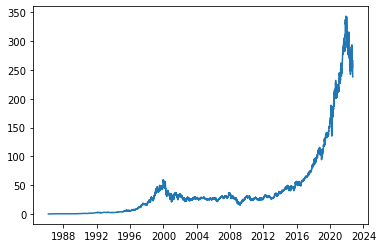

In [8]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [9]:
import numpy as np

# this function is going to take a dateframe, first date, and last date
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n = 3):
  first_date = str_to_datetime(first_date_str)
  last_date = str_to_datetime(last_date_str)
  
  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return
    
    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date + datetime.timedelta(days = 7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date= datetime.datetime(day = int(day), month = int(month), year = int(year))

    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y
  return ret_df

# Start day second time around: '2022-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-25	', 
                                '2022-09-23',
                                n = 3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
374,2022-09-19,252.220001,245.380005,244.740005,244.520004
375,2022-09-20,245.380005,244.740005,244.520004,242.449997
376,2022-09-21,244.740005,244.520004,242.449997,238.949997
377,2022-09-22,244.520004,242.449997,238.949997,240.979996


In [10]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((379,), (379, 3, 1), (379,))

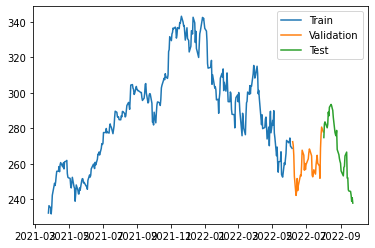

In [11]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3,1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation = 'relu'),
                    layers.Dense(32, activation = 'relu'),
                    layers.Dense(1)])
model.compile(loss = 'mse',
              optimizer = Adam(learning_rate = 0.001),
              metrics = ['mean_absolute_error'])
model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 100)


Epoch 1/100
10/10 [==============================] - 3s 69ms/step - loss: 84443.6406 - mean_absolute_error: 289.2729 - val_loss: 67528.8438 - val_mean_absolute_error: 259.7063
Epoch 2/100
10/10 [==============================] - 0s 10ms/step - loss: 84032.4766 - mean_absolute_error: 288.5627 - val_loss: 67078.6641 - val_mean_absolute_error: 258.8381
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 83428.2656 - mean_absolute_error: 287.5122 - val_loss: 66388.6250 - val_mean_absolute_error: 257.5017
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 82503.9297 - mean_absolute_error: 285.8973 - val_loss: 65266.7109 - val_mean_absolute_error: 255.3140
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 81037.4219 - mean_absolute_error: 283.3314 - val_loss: 63833.9023 - val_mean_absolute_error: 252.4923
Epoch 6/100
10/10 [==============================] - 0s 10ms/step - loss: 79196.4141 - mean_absolute_error: 280.0496 - val_

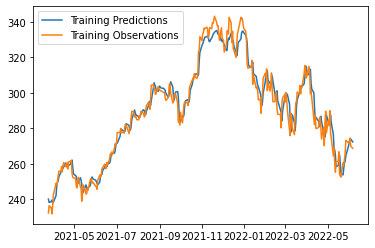

In [13]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

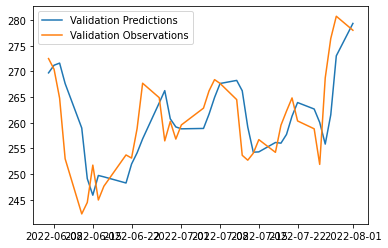

In [14]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

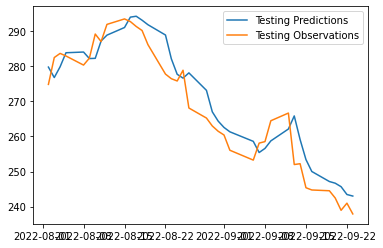

In [15]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

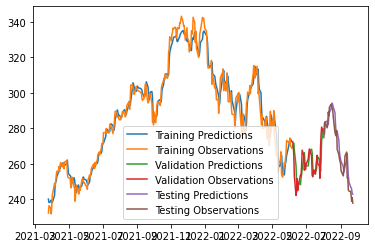

In [16]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [17]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

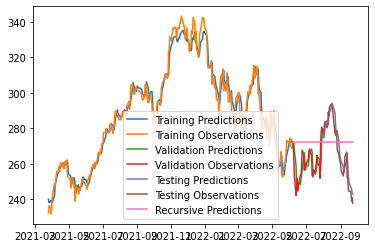

In [18]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])